# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [5]:
# stundent details example: John S. 9812
#                       student details 1: Shalev O. 9298
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: vs copilot
Goal: Make small fixes to functions and check variable accuracy to the methods during the project
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2: chat gpt
Goal: Give advices and general explanations (advantages and disadvantages) on different methods used during the experiment part.
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)

<pre>
Explanation of the Learning Problem and the Dataset:
This project addresses a binary classification problem, where the goal is to predict whether a passenger who boarded 
the Titanic survived (Survived = 1) or not (Survived = 0), based on personal attributes and travel conditions.
Two datasets are used: the training set contains 712 examples, and the test set contains 179 examples.
Each example is described by 7 features: passenger class (Pclass), sex (Sex – encoded numerically), age (Age), number of siblings/spouses aboard (SibSp),
number of parents/children aboard (Parch), ticket fare (Fare), and port of embarkation (Embarked – also numerically encoded).
The goal of the learning process is to develop an accurate model capable of predicting passenger survival based on these features.
</pre>




## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [6]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [7]:


# Load the training and test datasets
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

# Display the first few rows of each dataset
print("Train Dataset Preview:")
print(train_df.head())

print("\nTest Dataset Preview:")
print(test_df.head())


Train Dataset Preview:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Dataset Preview:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


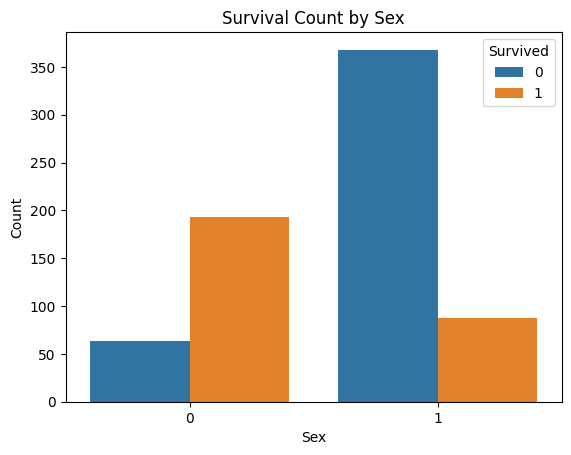

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=train_df)  # Create a bar plot showing the count of survivors and non-survivors for each sex
plt.title('Survival Count by Sex')                      # Set the title of the plot
plt.xlabel('Sex')                                       # Label for the x-axis
plt.ylabel('Count')                                     # Label for the y-axis
plt.legend(title='Survived')                            # Add a legend to indicate which color represents survival
plt.show()                                              # Display the plot

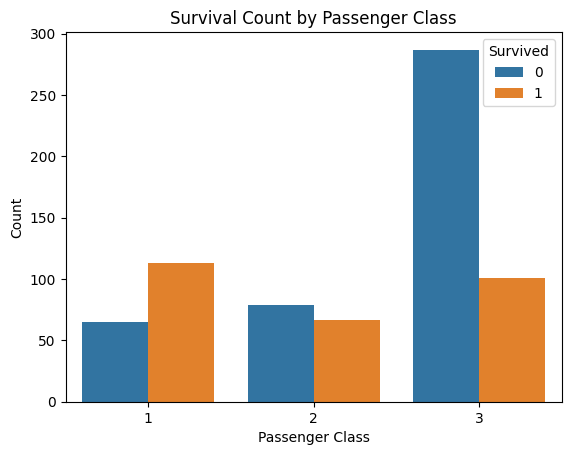

In [ ]:
# Plot the count of survivors and non-survivors for each passenger class (Pclass)
# This visualization helps to understand how passenger class (1st, 2nd, 3rd) relates to survival rates.

sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Passenger Class')  # Set the title of the plot
plt.xlabel('Passenger Class')                   # Label for the x-axis
plt.ylabel('Count')                             # Label for the y-axis
plt.legend(title='Survived')                    # Add a legend with the title 'Survived'
plt.show()                                      # Display the plot

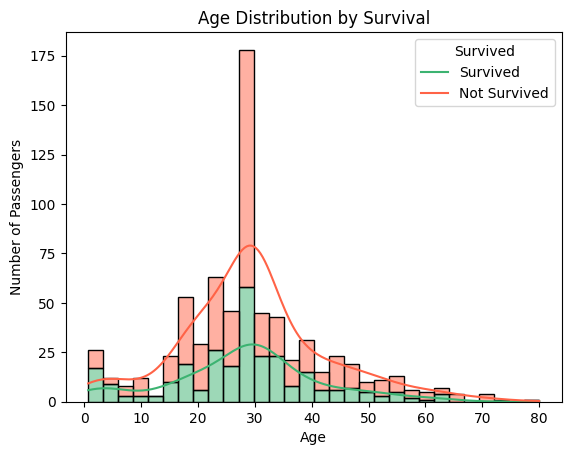

In [10]:
# Remove missing values in Age
age_df = train_df[['Age', 'Survived']].dropna()

# Define color palette: 0 = red (top), 1 = green (bottom)
palette = {0: 'tomato', 1: 'mediumseagreen'}

# Plot histogram with controlled stacking order
sns.histplot(data=age_df, x='Age', hue='Survived', kde=True, bins=30,
             multiple='stack', palette=palette, hue_order=[0, 1])

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Survived', 'Not Survived'])
plt.show()


In [11]:

# Compute correlation matrix with 'Pclass' included
correlation = train_df[['Survived', 'Pclass', 'Age', 'Fare']].corr()

# Display as styled table (works best in Jupyter)
correlation.style.background_gradient(cmap='coolwarm').format(precision=2)




,Survived,Pclass,Age,Fare
Survived,1.00,-0.32,-0.07,0.26
Pclass,-0.32,1.00,-0.32,-0.54
Age,-0.07,-0.32,1.00,0.07
Fare,0.26,-0.54,0.07,1.00


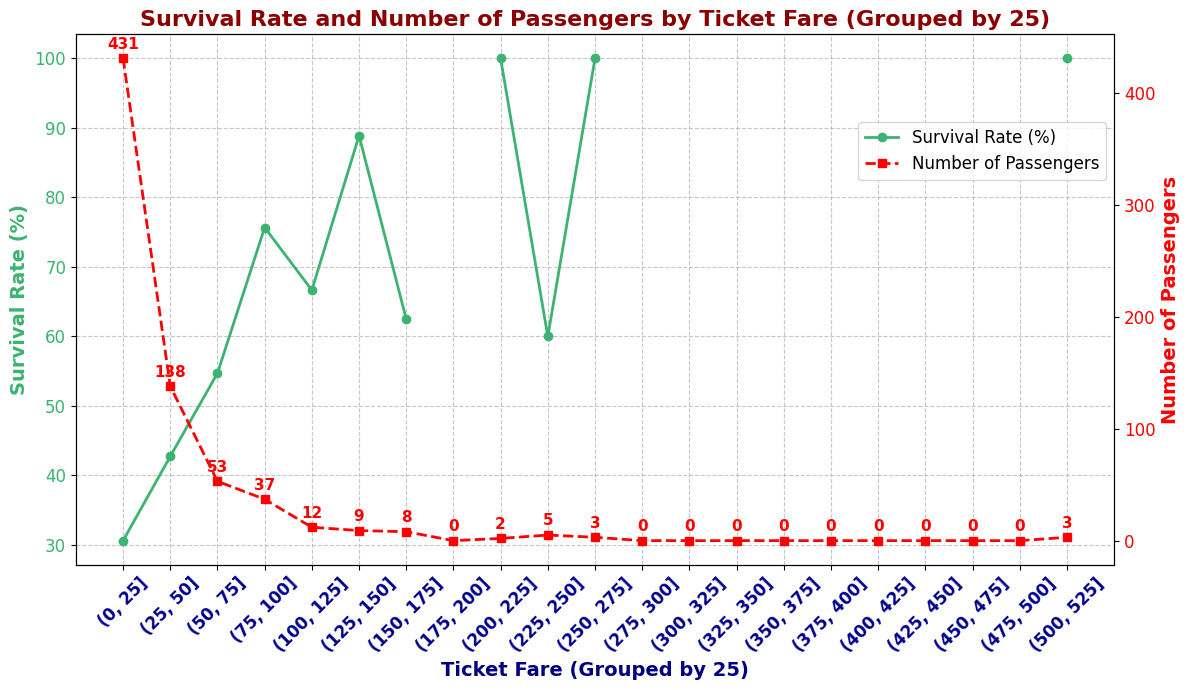

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Handle missing values in the 'Fare' column by filling them with the median
train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].median())

# Create fare groups with 25-unit intervals
fare_bins = list(range(0, int(train_df["Fare"].max()) + 25, 25))
train_df["FareGroup"] = pd.cut(train_df["Fare"], bins=fare_bins)

# Calculate the survival rate for each fare group
survival_rates = train_df.groupby("FareGroup", observed=False)["Survived"].mean() * 100

# Calculate the number of passengers in each fare group
passenger_counts = train_df["FareGroup"].value_counts().sort_index()

# Create a visualization
fig, ax1 = plt.subplots(figsize=(12, 7))

# Survival rate line (green)
ax1.plot(
    survival_rates.index.astype(str),
    survival_rates.values,
    marker='o',
    linestyle='-',
    color='mediumseagreen',
    label='Survival Rate (%)',
    linewidth=2
)
ax1.set_xlabel("Ticket Fare (Grouped by 25)", fontsize=14, fontweight='bold', color='navy')
ax1.set_ylabel("Survival Rate (%)", fontsize=14, fontweight='bold', color='mediumseagreen')
ax1.tick_params(axis='y', labelcolor='mediumseagreen', labelsize=12)
ax1.set_xticks(range(len(survival_rates.index)))
ax1.set_xticklabels(survival_rates.index.astype(str), rotation=45, fontsize=12, fontweight='bold', color='darkblue')

# Number of passengers line (red, secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(
    passenger_counts.index.astype(str),
    passenger_counts.values,
    marker='s',
    linestyle='--',
    color='red',
    label='Number of Passengers',
    linewidth=2
)
ax2.set_ylabel("Number of Passengers", fontsize=14, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)
ax2.set_xticks(range(len(passenger_counts.index)))
ax2.set_xticklabels(passenger_counts.index.astype(str), rotation=45, fontsize=12, fontweight='bold', color='red')

# Add data labels to the red line (number of passengers)
for i, (x, y) in enumerate(zip(passenger_counts.index.astype(str), passenger_counts.values)):
    ax2.text(i, y + max(passenger_counts.values)*0.02, str(y), color='red', fontsize=11, fontweight='bold', ha='center')

# Title and grid
plt.title("Survival Rate and Number of Passengers by Ticket Fare (Grouped by 25)", fontsize=16, fontweight='bold', color='darkred')
ax1.grid(True, linestyle='--', alpha=0.7)

# Legends (upper right)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc='upper right',
    bbox_to_anchor=(1, 0.85),
    fontsize=12
)

plt.tight_layout()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [13]:
def add_family_size(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    # Adds a 'FamilySize' column: total family members aboard (SibSp + Parch + 1)
    # This feature helps capture the effect of traveling with family on survival chances
    df_copy = df.copy()
    df_copy['FamilySize'] = df_copy['SibSp'] + df_copy['Parch'] + 1
    return df_copy

def add_is_alone(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    # Adds an 'IsAlone' column: 1 if the passenger is alone (FamilySize == 1), 0 otherwise
    # Being alone or with family may influence survival probability
    df_copy = df.copy()
    if 'FamilySize' not in df_copy.columns:
        df_copy = add_family_size(df_copy)
    df_copy['IsAlone'] = (df_copy['FamilySize'] == 1).astype(int)
    return df_copy

def add_age_group(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    # Adds an 'AgeGroup' column: categorizes 'Age' into bins labeled 1-5
    # Age bins:
    # 1:  0-12   (Child)
    # 2: 12-18   (Teen)
    # 3: 18-35   (Young)
    # 4: 35-60   (Adult)
    # 5: 60-120  (Senior)
    # Age groups can help the model learn different survival patterns for different age ranges
    df_copy = df.copy()
    df_copy['AgeGroup'] = pd.cut(
        df_copy['Age'],
        bins=[0, 12, 18, 35, 60, 120],
        labels=[1, 2, 3, 4, 5]
    )
    return df_copy

def add_fare_group(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    # Adds a 'FareGroup' column: categorizes 'Fare' into bins labeled 1-4
    # Fare bins:
    # 1: 0-50      (Low)
    # 2: 50-100    (Mid)
    # 3: 100-150   (High)
    # 4: 150-600   (VeryHigh)
    # Grouping fares can help capture the effect of ticket price/class on survival
    df_copy = df.copy()
    df_copy['FareGroup'] = pd.cut(
        df_copy['Fare'],
        bins=[-1, 50, 100, 150, 600],
        labels=[1, 2, 3, 4]
    )
    return df_copy

In [14]:
# --- Usage examples ---

# Add FamilySize feature
train_df1 = add_family_size(train_df)
train_df1 = add_is_alone(train_df1)
train_df1 = add_age_group(train_df1)
train_df1 = add_fare_group(train_df1)


train_df1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FareGroup,FamilySize,IsAlone,AgeGroup
0,1,0,54.000000,1,0,78.2667,1,1,2,2,0,4
1,2,0,45.000000,0,0,13.5000,0,1,1,1,1,4
2,3,1,20.000000,0,0,9.5000,0,0,1,1,1,3
3,3,1,36.000000,0,0,7.8958,0,0,1,1,1,4
4,3,1,22.000000,0,0,8.0500,0,0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
707,1,1,54.000000,0,0,51.8625,0,0,2,1,1,4
708,3,1,14.000000,5,2,46.9000,0,0,1,8,0,2
709,2,0,6.000000,0,1,33.0000,0,1,1,2,0,1
710,2,1,29.699118,0,0,0.0000,0,0,1,1,1,3


In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def create_normalized_data(df, numeric_features):
    # Create a new DataFrame containing only the specified numeric features,
    # and normalize them to the [0,1] range using MinMaxScaler.
    scaler = MinMaxScaler()
    df_numeric = df[numeric_features].copy()
    df_numeric[numeric_features] = scaler.fit_transform(df_numeric[numeric_features])
    return df_numeric

# Example usage:
# List of numeric features to normalize
numeric_features = ['Age', 'Fare', 'FamilySize', 'SibSp', 'Parch']
# Create a normalized DataFrame with only the numeric features
normalized_df = create_normalized_data(train_df1, numeric_features)
normalized_df

,Age,Fare,FamilySize,SibSp,Parch
0,0.672255,0.152766,0.1,0.125,0.000000
1,0.558805,0.026350,0.0,0.000,0.000000
2,0.243666,0.018543,0.0,0.000,0.000000
3,0.445355,0.015412,0.0,0.000,0.000000
4,0.268877,0.015713,0.0,0.000,0.000000
...,...,...,...,...,...
707,0.672255,0.101229,0.0,0.000,0.000000
708,0.168032,0.091543,0.7,0.625,0.333333
709,0.067188,0.064412,0.1,0.000,0.166667
710,0.365929,0.000000,0.0,0.000,0.000000


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

# Use the normalized features and the target variable
X = normalized_df  # normalized features DataFrame
y = train_df1["Survived"]  # target labels

# Split the normalized data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the range of k values to search
param_grid = {'n_neighbors': list(range(1, 5))}

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)

# Set up 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with 5-fold cross-validation and f1-macro as the scoring metric
grid = GridSearchCV(knn, param_grid, cv=cv, scoring='f1_macro', return_train_score=True)
grid.fit(X_train, y_train)

# --- PRETTY F1-MACRO TABLES ---
# Collect all F1 scores for each k and fold into a DataFrame for pretty display
f1_scores_dict = {}
for i, k in enumerate(param_grid['n_neighbors']):
    f1_scores_dict[f'k={k}'] = [grid.cv_results_[f'split{fold}_test_score'][i] for fold in range(cv.get_n_splits())]
f1_df = pd.DataFrame(f1_scores_dict, index=[f'Fold {i+1}' for i in range(cv.get_n_splits())])

print("Cross-validation F1-macro scores (rows = folds, columns = k):")
display(f1_df)  # If running in Jupyter, this will show a nice table



# Print the best result
print(f"\nBest k: {grid.best_params_['n_neighbors']}")
print(f"Best cross-validated f1-macro: {grid.best_score_:.3f}")

# Evaluate on the test set with the best k
y_pred = grid.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test f1-macro with best k: {test_f1:.3f}")

Cross-validation F1-macro scores (rows = folds, columns = k):


,k=1,k=2,k=3,k=4
Fold 1,0.637564,0.637564,0.632850,0.652982
Fold 2,0.559846,0.546474,0.580694,0.546474
Fold 3,0.615467,0.607458,0.637224,0.622292
Fold 4,0.666883,0.679563,0.668467,0.664903
Fold 5,0.707718,0.712907,0.699668,0.655488



Best k: 3
Best cross-validated f1-macro: 0.644
Test f1-macro with best k: 0.652


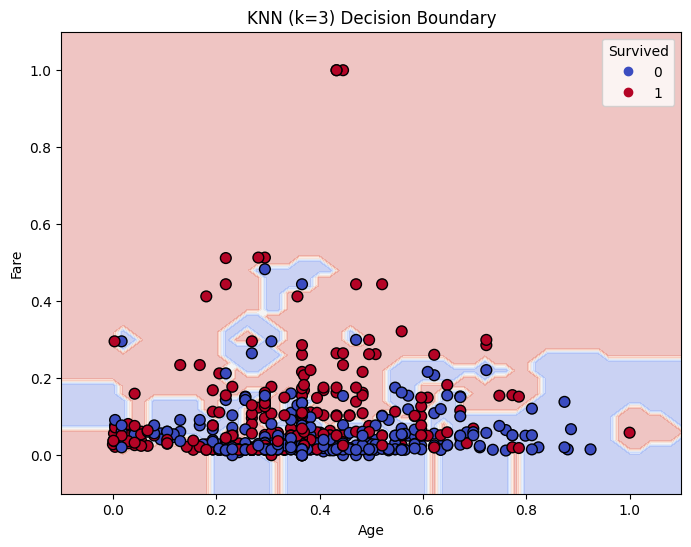

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

def plot_knn_decision_boundary(X, y, k=3, feature_names=None):
    # Select only two features for visualization
    if X.shape[1] > 2:
        X_vis = X.iloc[:, :2]
        if feature_names is None:
            feature_names = X_vis.columns.tolist()
    else:
        X_vis = X
        if feature_names is None:
            feature_names = X.columns.tolist()

    # Fit KNN
    knn_vis = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    knn_vis.fit(X_vis, y)

    # Create meshgrid
    h = 0.02
    x_min, x_max = X_vis.iloc[:, 0].min() - 0.1, X_vis.iloc[:, 0].max() + 0.1
    y_min, y_max = X_vis.iloc[:, 1].min() - 0.1, X_vis.iloc[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=feature_names)
    Z = knn_vis.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=60)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f"KNN (k={k}) Decision Boundary")
    plt.legend(*scatter.legend_elements(), title="Survived")
    plt.show()
    
    
plot_knn_decision_boundary(normalized_df, train_df1["Survived"], k=3)

In [18]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Feature engineering functions (assume already defined: add_family_size, add_is_alone, add_age_group, add_fare_group)

# Define feature sets to test
feature_sets = [
    (0, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']),
    (1, ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']),
    (2, ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone']),
    (3, ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']),
    (4, ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'FamilySize', 'IsAlone', 'AgeGroup', 'FareGroup']),
    (5, ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'AgeGroup']),
    (6, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'FamilySize', 'IsAlone', 'FareGroup']),
    (7, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'AgeGroup', 'FareGroup'])
]

In [25]:
# Decision Tree only

# Define a list of Decision Tree models with different hyperparameters to test.
dt_models = [
    ('DecisionTree', DecisionTreeClassifier(), {
        'clf__max_depth': [4, 6],           # Maximum depth of the tree
        'clf__min_samples_split': [10, 20], # Minimum samples required to split an internal node
        'clf__min_samples_leaf': [2],       # Minimum samples required to be at a leaf node
    }),
]

results_dt = []  # List to store results for each feature set and model
y = train_df1['Survived']  # Target variable

# Loop over all feature sets defined earlier
for idx, features in feature_sets:
    X = train_df1[features]  # Select the features for this combination
    for model_name, model, param_grid in dt_models:
        steps = [('clf', model)]  # Create a pipeline step for the classifier
        pipe = Pipeline(steps)
        scorer = make_scorer(f1_score, average='macro')  # Use macro F1-score for evaluation
        # Run grid search with cross-validation
        grid = GridSearchCV(pipe, param_grid, scoring=scorer, cv=5, return_train_score=True)
        grid.fit(X, y)  # Fit the model on the data
        best_idx = grid.best_index_  # Index of the best hyperparameter combination
        # Collect F1 scores for each fold
        fold_scores = [grid.cv_results_[f'split{fold}_test_score'][best_idx] for fold in range(5)]
        # Store results in a dictionary
        result_row = {
            'combo_num': idx,                # Feature set index
            'model': model_name,             # Model name
            'best_score': grid.best_score_,  # Best average cross-validated F1 score
            'best_params': grid.best_params_ # Best hyperparameters
        }
        for fold in range(5):
            result_row[f'cross{fold+1}_f1'] = fold_scores[fold]  # F1 score for each fold
        results_dt.append(result_row)  # Add results to the list

# Convert results to a DataFrame for easy viewing and sorting
df_results_dt = pd.DataFrame(results_dt)
df_results_dt = df_results_dt.sort_values(by='best_score', ascending=False)

# Print the results table with F1 scores for each fold
print("Decision Tree Results:")
print(df_results_dt[['combo_num', 'model', 'best_score', 'cross1_f1', 'cross2_f1', 'cross3_f1', 'cross4_f1', 'cross5_f1']])

Decision Tree Results:
   combo_num         model  best_score  cross1_f1  cross2_f1  cross3_f1  \
4          4  DecisionTree    0.809573   0.796843   0.836350   0.778862   
6          6  DecisionTree    0.808765   0.796843   0.841989   0.778862   
1          1  DecisionTree    0.795401   0.776841   0.828278   0.764120   
0          0  DecisionTree    0.795291   0.776841   0.836350   0.764120   
7          7  DecisionTree    0.795044   0.776841   0.835115   0.764120   
3          3  DecisionTree    0.793677   0.776841   0.828278   0.764120   
5          5  DecisionTree    0.792806   0.776841   0.785586   0.764120   
2          2  DecisionTree    0.792052   0.776841   0.836350   0.755976   

   cross4_f1  cross5_f1  
4   0.826230   0.809580  
6   0.847016   0.779113  
1   0.821944   0.785822  
0   0.821944   0.777201  
7   0.821944   0.777201  
3   0.821944   0.777201  
5   0.831717   0.805766  
2   0.813893   0.777201  


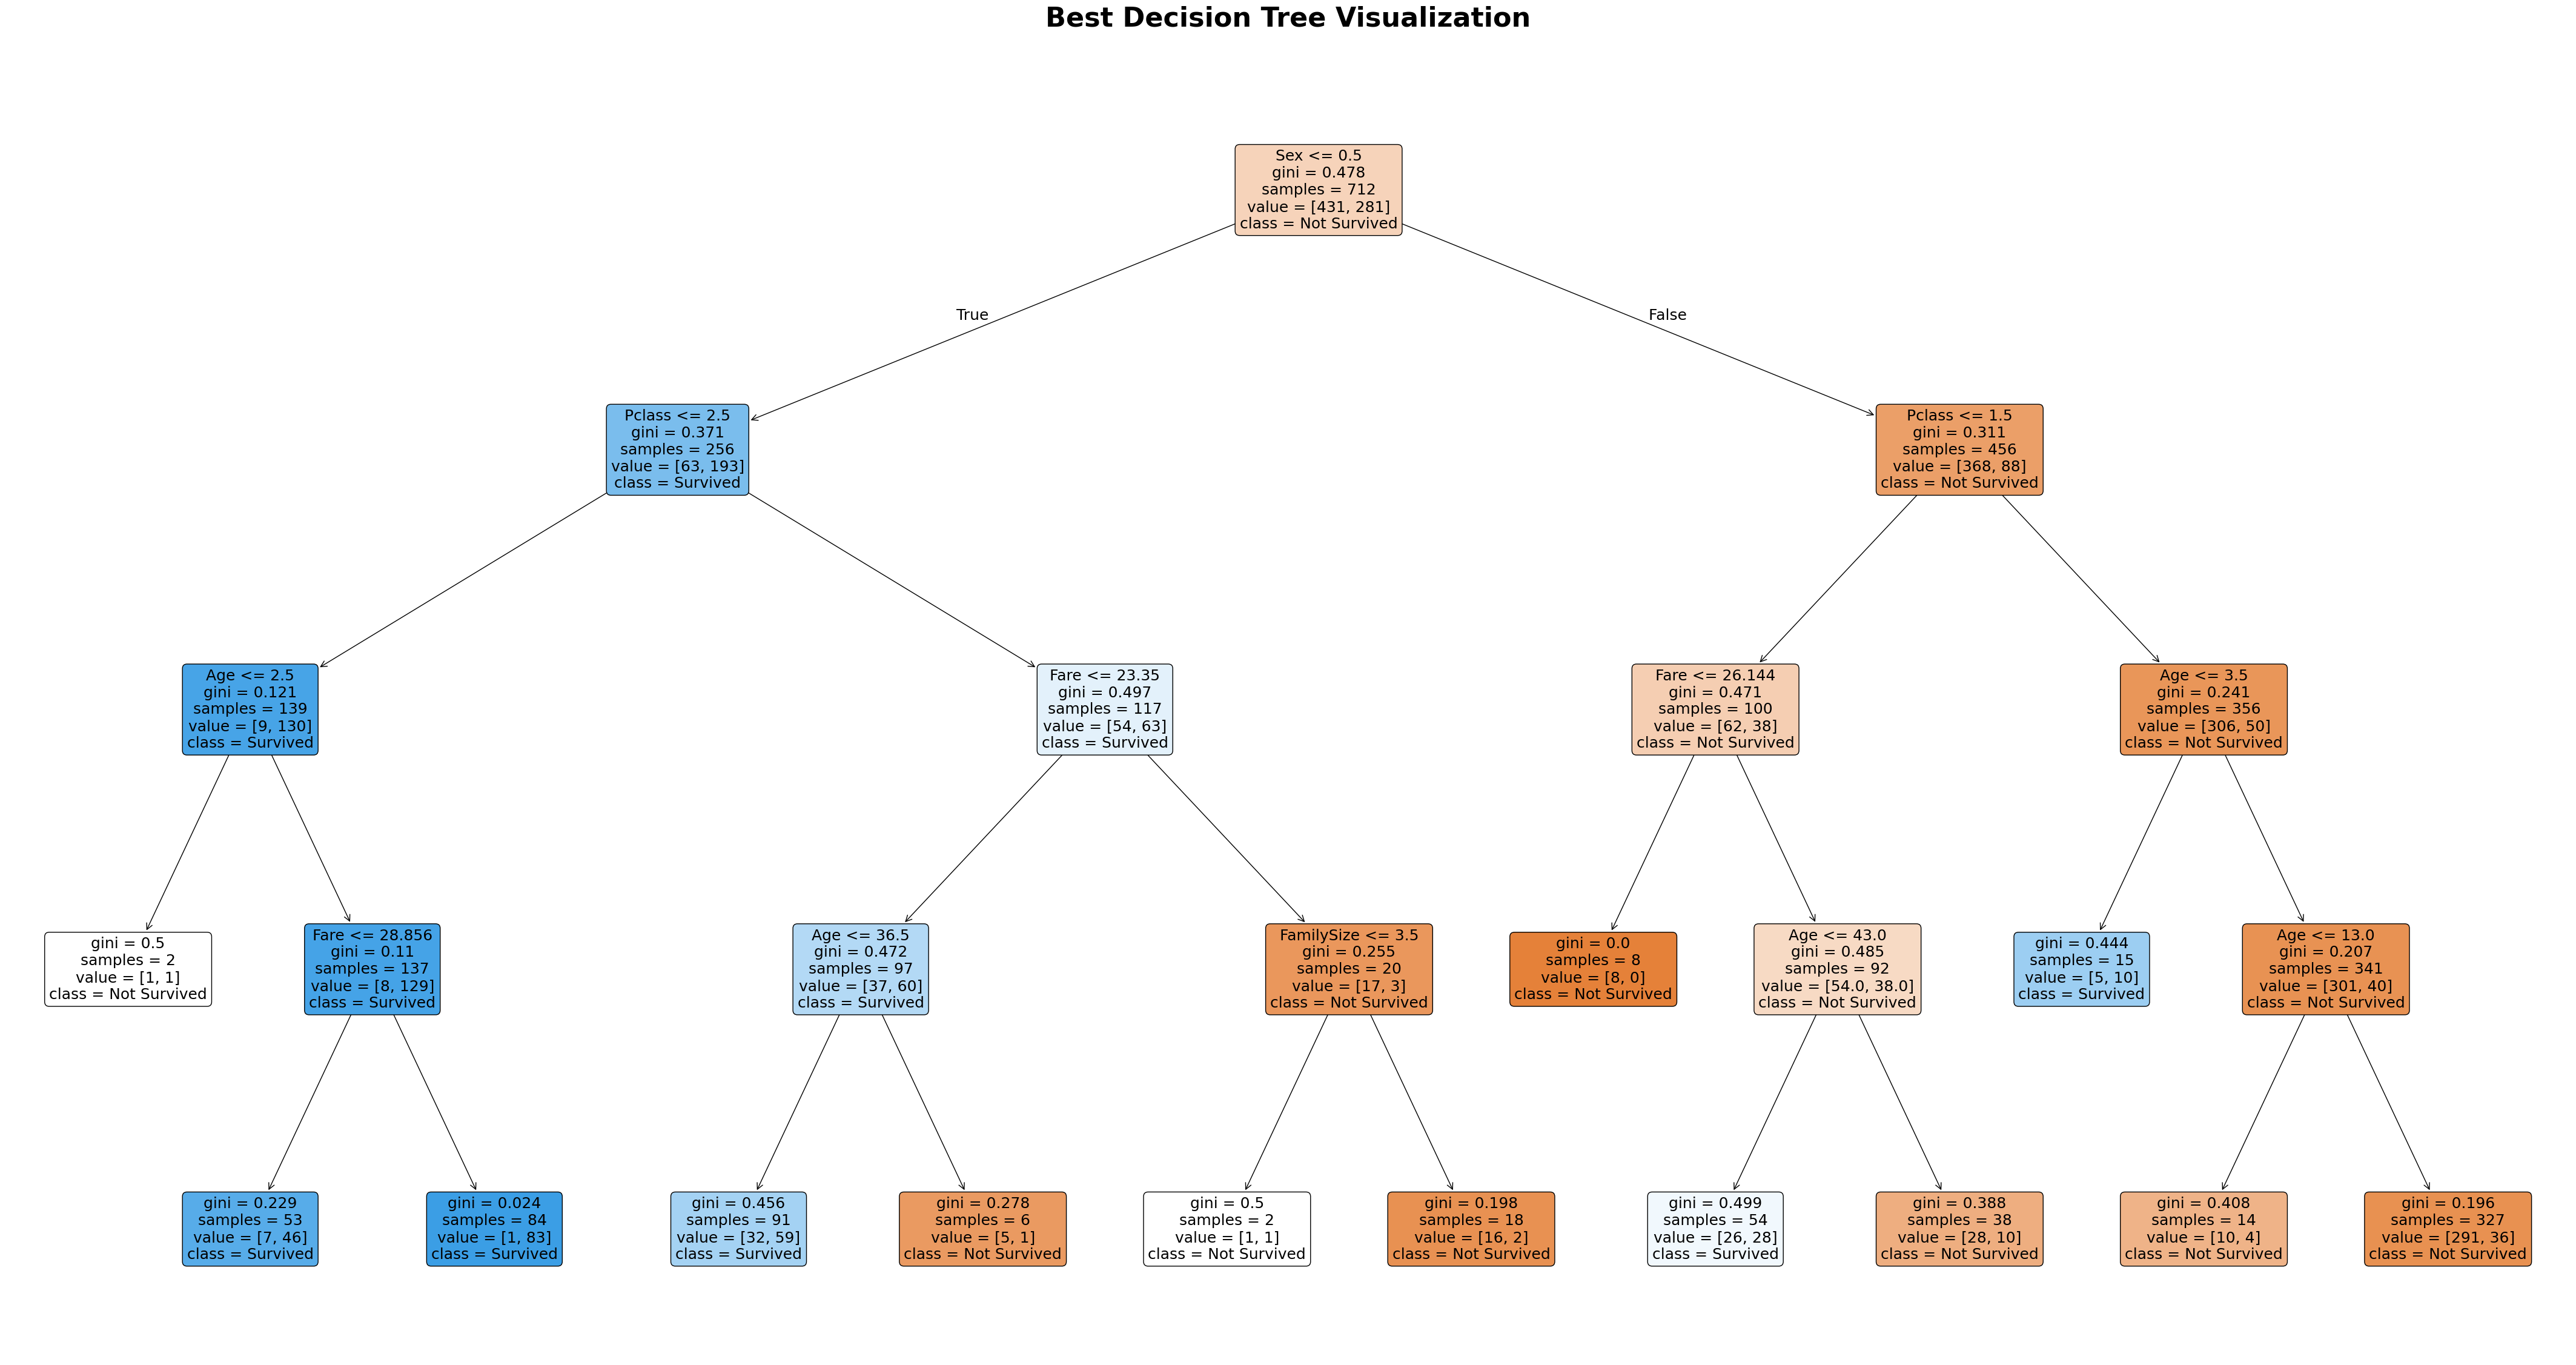

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

# Select the best feature set and parameters from the results table
best_row = df_results_dt.iloc[0]
best_features = feature_sets[best_row['combo_num'] - 1][1]  # combo_num is 1-based
best_params = best_row['best_params']

# Prepare the data for the tree
X_best = train_df1[best_features]
y_best = train_df1['Survived']

# Create and fit the DecisionTreeClassifier with the best parameters
dt_best = DecisionTreeClassifier(
    max_depth=best_params.get('clf__max_depth', None),
    min_samples_split=best_params.get('clf__min_samples_split', 2),
    min_samples_leaf=best_params.get('clf__min_samples_leaf', 1),
    random_state=42
)
dt_best.fit(X_best, y_best)

# --- Visualization in a separate, well-spaced plot cell ---
# This will create a very large, clear, and separate plot for the decision tree.
fig = plt.figure(figsize=(44, 24))  # Even larger figure for more spacing
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(
    dt_best,
    feature_names=best_features,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=18,  # Larger font for readability
    ax=ax
)
plt.title("Best Decision Tree Visualization", fontsize=32, fontweight='bold', pad=40)
plt.subplots_adjust(left=0.01, right=0.99, top=0.90, bottom=0.01, wspace=0.4, hspace=0.4)  # Extra spacing
plt.tight_layout(pad=6.0)  # Add even more padding
plt.show()

In [21]:
# --- Random Forest Model Selection and Evaluation ---

# Define a list of Random Forest models with different hyperparameters to test.
rf_models = [
    ('RandomForest', RandomForestClassifier(random_state=42), {
        'clf__num_of_trees': [50],  # Number of trees in the forest (will be renamed to n_estimators)
        'clf__max_depth': [5,10],   # Maximum depth of each tree
        'clf__min_samples_split': [2, 5]  # Minimum samples required to split an internal node
    }),
]

results_rf = []  # List to store results for each feature set and model

# Set up 5-fold stratified cross-validation to ensure balanced class distribution in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over all feature sets defined earlier
for idx, features in feature_sets:
    X = train_df1[features]  # Select the features for this combination
    for model_name, model, param_grid in rf_models:
        # Rename 'num_of_trees' to 'n_estimators' as required by RandomForestClassifier
        if 'clf__num_of_trees' in param_grid:
            param_grid = param_grid.copy()
            param_grid['clf__n_estimators'] = param_grid.pop('clf__num_of_trees')
        steps = [('clf', model)]  # Create a pipeline step for the classifier
        pipe = Pipeline(steps)
        scorer = make_scorer(f1_score, average='macro')  # Use macro F1-score for evaluation
        # Run grid search with cross-validation
        grid = GridSearchCV(pipe, param_grid, scoring=scorer, cv=cv, return_train_score=True)
        grid.fit(X, y)  # Fit the model on the data
        best_idx = grid.best_index_  # Index of the best hyperparameter combination
        # Collect F1 scores for each fold
        fold_scores = [grid.cv_results_[f'split{fold}_test_score'][best_idx] for fold in range(5)]
        # Store results in a dictionary
        result_row = {
            'combo_num': idx,
            'model': model_name,
            'best_score': grid.best_score_,
            'best_params': grid.best_params_
        }
        for fold in range(5):
            result_row[f'cross{fold+1}_f1'] = fold_scores[fold]
        results_rf.append(result_row)  # Add results to the list

# Convert results to a DataFrame for easy viewing and sorting
df_results_rf = pd.DataFrame(results_rf)
df_results_rf = df_results_rf.sort_values(by='best_score', ascending=False)

# Print the results table with F1 scores for each fold
print("Random Forest Results:")
print(df_results_rf[['combo_num', 'model', 'best_score', 'cross1_f1', 'cross2_f1', 'cross3_f1', 'cross4_f1', 'cross5_f1']])

# Print the best hyperparameters for the top-performing model
best_row = df_results_rf.iloc[0]
print("\nBest hyperparameters for the top result:")
print(best_row['best_params'])

Random Forest Results:
   combo_num         model  best_score  cross1_f1  cross2_f1  cross3_f1  \
6          6  RandomForest    0.800958   0.788462   0.770228   0.821944   
5          5  RandomForest    0.797154   0.795162   0.775157   0.796010   
4          4  RandomForest    0.796789   0.781794   0.768548   0.811120   
0          0  RandomForest    0.795035   0.781794   0.776841   0.804325   
7          7  RandomForest    0.793682   0.788462   0.747087   0.851620   
1          1  RandomForest    0.792771   0.809216   0.760168   0.793605   
2          2  RandomForest    0.788398   0.794540   0.783480   0.778862   
3          3  RandomForest    0.782259   0.790147   0.761964   0.804325   

   cross4_f1  cross5_f1  
6   0.811120   0.813035  
5   0.790825   0.828615  
4   0.792268   0.830217  
0   0.792268   0.819946  
7   0.754338   0.826906  
1   0.752574   0.848291  
2   0.750678   0.834429  
3   0.752574   0.802283  

Best hyperparameters for the top result:
{'clf__max_depth': 5, 'cl

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [22]:
def train_best_rf_model(train_df1, df_results_rf, feature_sets):
    # This function trains the best Random Forest model on the entire training set.
    # It returns the trained model, the feature names used, and the best hyperparameters.
    
    # Get the row with the best cross-validated score from the results DataFrame
    best_row = df_results_rf.iloc[0]
    # Extract the feature names for the best feature combination (combo_num is 1-based)
    best_features = feature_sets[best_row['combo_num'] - 1][1]
    # Extract the best hyperparameters found by GridSearchCV
    best_params = best_row['best_params']

    # Create the Random Forest model with the best hyperparameters
    rf_best = RandomForestClassifier(
        n_estimators=best_params.get('clf__n_estimators', 50),
        max_depth=best_params.get('clf__max_depth', None),
        min_samples_split=best_params.get('clf__min_samples_split', 2),
        random_state=42
    )
    # Select the relevant features and target from the training set
    X_best = train_df1[best_features]
    y_best = train_df1['Survived']
    # Fit the model on the entire training set
    rf_best.fit(X_best, y_best)
    # Return the trained model, feature names, and best parameters
    return rf_best, best_features, best_params

# Example usage:
rf_model, rf_features, rf_params = train_best_rf_model(train_df1, df_results_rf, feature_sets)

print(rf_features)
print(rf_params)
print(rf_model)


        

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'AgeGroup']
{'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 50}
RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)


In [23]:
# Show cross-validation results for the best Random Forest model
best_row = df_results_rf.iloc[0]  # Select the row with the best average F1-macro score

print("F1-macro for each fold in cross-validation:")  # Print header in English
for i in range(1, 6):
    # Print the F1-macro score for each fold
    print(f"Fold {i}: {best_row[f'cross{i}_f1']:.3f}")

# Print the average F1-macro score across all folds
print(f"\nAverage F1-macro: {best_row['best_score']:.3f}")

F1-macro for each fold in cross-validation:
Fold 1: 0.788
Fold 2: 0.770
Fold 3: 0.822
Fold 4: 0.811
Fold 5: 0.813

Average F1-macro: 0.801


## Part 5 - Apply on test and show model performance estimation

In [26]:
# --- Feature engineering for test set ---
# Apply the same feature engineering steps to the test set as were used for the training set
test_df1 = add_family_size(test_df)
test_df1 = add_is_alone(test_df1)
test_df1 = add_age_group(test_df1)
test_df1 = add_fare_group(test_df1)

# --- Use the best model, features, and params from part 4 ---
# The variables rf_model, rf_features, and rf_params were already created in the previous cell

# --- Predict on test set ---
# Select the same features as used for training and predict the labels for the test set
X_test_final = test_df1[rf_features]
y_test_pred = rf_model.predict(X_test_final)

# --- Show first 10 predictions and correctness ---
print("First 10 predictions on test set:", y_test_pred[:10])

# If the test set contains the true labels (column 'Survived'), show correctness for each prediction
if 'Survived' in test_df1.columns:
    true_labels = test_df1['Survived'].values[:10]
    pred_labels = y_test_pred[:10]
    correctness = (pred_labels == true_labels).astype(int)
    print("True labels for first 10 test samples:   ", true_labels)
    print("Correctness for first 10 test samples:   ", correctness)
    accuracy_10 = correctness.mean()
    print(f"Accuracy for first 10 test samples: {accuracy_10:.2f}")
else:
    print("True labels for the test set are not available, so correctness cannot be calculated.")

# --- Show model quality from cross-validation ---
print("\nF1-macro for each fold in cross-validation:")
for i in range(1, 6):
    print(f"Fold {i}: {df_results_rf.iloc[0][f'cross{i}_f1']:.3f}")
print(f"\nAverage F1-macro: {df_results_rf.iloc[0]['best_score']:.3f}")

First 10 predictions on test set: [0 0 0 1 0 1 0 0 1 0]
True labels for first 10 test samples:    [0 0 0 0 1 1 0 0 1 0]
Correctness for first 10 test samples:    [1 1 1 0 0 1 1 1 1 1]
Accuracy for first 10 test samples: 0.80

F1-macro for each fold in cross-validation:
Fold 1: 0.788
Fold 2: 0.770
Fold 3: 0.822
Fold 4: 0.811
Fold 5: 0.813

Average F1-macro: 0.801
